<h1>Mnist 多层感知器版更换初始化<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数-normal" data-toc-modified-id="初始化模型参数-normal-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数-normal</a></span></li><li><span><a href="#初始化模型参数-zero" data-toc-modified-id="初始化模型参数-zero-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>初始化模型参数-zero</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数-normal

In [3]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,100],mean=0,stddev=0.1,seed=66))
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.truncated_normal([100,100],mean=0,stddev=0.1,seed=66))
b2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100,100],mean=0,stddev=0.1,seed=66))
b3 = tf.Variable(tf.zeros([100]))
W4 = tf.Variable(tf.truncated_normal([100,100],mean=0,stddev=0.1,seed=66))
b4 = tf.Variable(tf.zeros([100]))
W5 = tf.Variable(tf.truncated_normal([100,10],mean=0,stddev=0.1,seed=66))
b5 = tf.Variable(tf.zeros([10]))

In [4]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [5]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [6]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [7]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

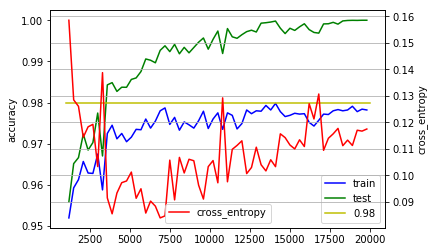

In [8]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [9]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.158536,0.128494,0.126047,0.114378,0.118317,0.119257,0.103324,0.138763,0.091492,0.085489,...,0.109450,0.113990,0.115664,0.117731,0.111200,0.113294,0.111272,0.117037,0.116697,0.117492
test,0.955873,0.965182,0.966636,0.972345,0.968473,0.970291,0.977455,0.967036,0.984291,0.984836,...,0.999091,0.999127,0.999473,0.999036,0.999818,0.999927,0.999964,0.999945,0.999982,0.999982
train,0.952000,0.959300,0.961300,0.965700,0.962900,0.962800,0.967500,0.958800,0.972500,0.974500,...,0.977200,0.977100,0.978000,0.978300,0.978000,0.978200,0.979100,0.977800,0.978400,0.978200


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化
- 初始化**多层隐层改变初始化后97.7%**
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 初始化模型参数-zero

In [18]:
# 初始化模型参数
x  = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,200],mean=0,stddev=0.5,seed=66))
b1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200,200],mean=0,stddev=0.1,seed=66))
b2 = tf.Variable(tf.zeros([200]))
W3 = tf.Variable(tf.truncated_normal([200,100],mean=0,stddev=0.1,seed=66))
b3 = tf.Variable(tf.zeros([100]))
W4 = tf.Variable(tf.truncated_normal([100,100],mean=0,stddev=0.1,seed=66))
b4 = tf.Variable(tf.zeros([100]))
W5 = tf.Variable(tf.zeros([100,10]))
b5 = tf.Variable(tf.zeros([10]))

In [19]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.tanh(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.relu(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [20]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [21]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [22]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

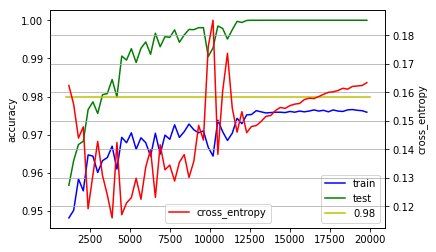

In [23]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [24]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.162403,0.155777,0.143980,0.147904,0.119163,0.131007,0.142806,0.130846,0.124021,0.115962,...,0.159314,0.160004,0.1602,0.160634,0.16144,0.161121,0.162072,0.162242,0.162401,0.163417
test,0.956745,0.963236,0.967436,0.968273,0.976564,0.978618,0.975564,0.980491,0.980782,0.984473,...,1.000000,1.000000,1.0000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
train,0.948200,0.950200,0.958400,0.955300,0.964700,0.964400,0.960100,0.963200,0.964000,0.967000,...,0.976400,0.976000,0.9765,0.976200,0.97610,0.976500,0.976600,0.976400,0.976300,0.975900


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层
- 激活函数
- 正则化
- 初始化`多层隐层改变初始化后97%`
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

四层隐层之后,改变初始化后,正确率达到97%

## 结论

适当改变初始化